# Check my LES run - 2D output

* The below notebook allows to compare a selected set of large-eddy simulation.
* All requested 2D variables are here read and plotted. "load_sims_2d" reports variable that are missing. Maps will not show, if a variable is missing or if it contains missing values.
* In case you find inconsistencies in the benchmark set or wish to expand the code, please contact Ann Fridlind (ann.fridlind@nasa.gov), Timothy Juliano (tjuliano@ucar.edu), and Florian Tornow (ft2544@columbia.edu).

In [1]:
%run functions_plotting.py

## select LES run(s) of interest
sim_keyword = 'FixN_2D'  

## select specfic time
time_vec = [18.0]

In [2]:
vars_mean_list = pd.read_excel('https://docs.google.com/spreadsheets/d/1Vl8jYGviet7EtXZuQiitrx4NSkV1x27aJAhxxjBb9zI/export?gid=1756539842&format=xlsx',
                              sheet_name='2D')


pd.set_option('display.max_rows', None)
vars_mean_list

## short names
var_vec_2d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time, x, y'])

## long names
var_vec_2d_long = np.asarray(vars_mean_list.standard_name[vars_mean_list.dimensions == 'time, x, y'])

## units
var_vec_2d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time, x, y'])

In [3]:
## load all simulations located in subfolders of the given directory
df_col_2d = load_sims_2d('/data/project/comble-mip/output_les/',var_vec_2d,t_shift=-2,times=time_vec,keyword=sim_keyword)

Loading variables: f(time,x,y)
/data/project/comble-mip/output_les/wrf/WRF_Lx25_dx100_FixN_2D.nc


ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


NaN values in pr
NaN values in lwp
NaN values in iwp
NaN values in opt
NaN values in alb
NaN values in olr11
/data/project/comble-mip/output_les/dharma/DHARMA_Lx25_dx100_FixN_2D.nc
No field for ustar
/data/project/comble-mip/output_les/uclales-salsa/UCLALES-SALSA_Lx25_dx100_FixN_2D.nc
...adjusting x and y values


In [5]:
df_col_2d['x'][:]

<xarray.DataArray 'x' (x: 256)> Size: 2kB
array([-12800., -12700., -12600., ...,  12500.,  12600.,  12700.])
Coordinates:
  * x        (x) float64 2kB -1.28e+04 -1.27e+04 -1.26e+04 ... 1.26e+04 1.27e+04
Attributes:
    units:      m
    long_name:  x

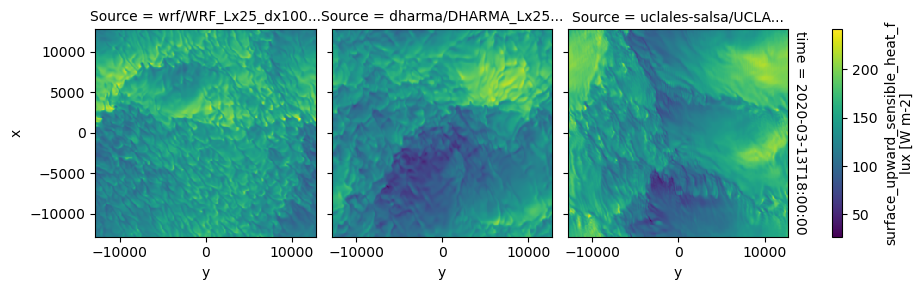

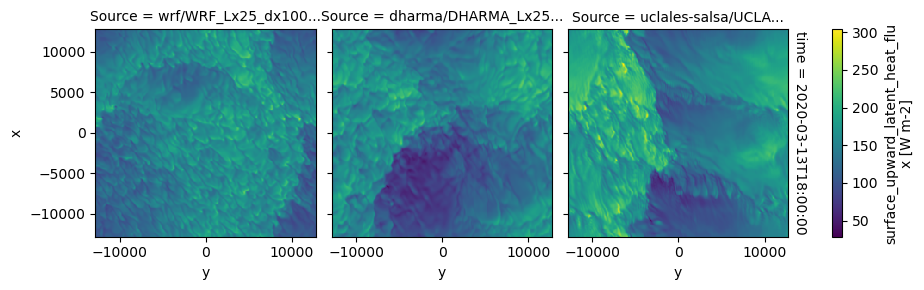

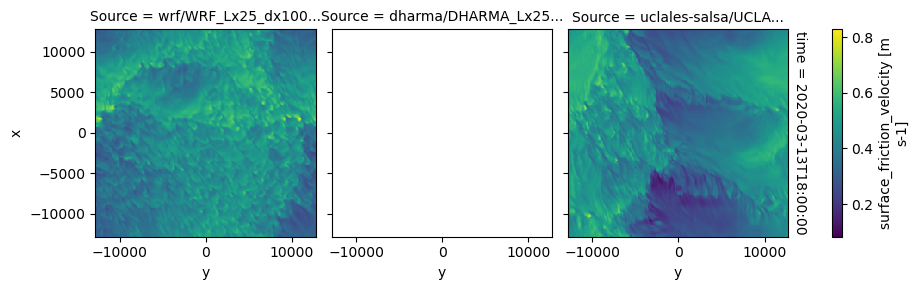

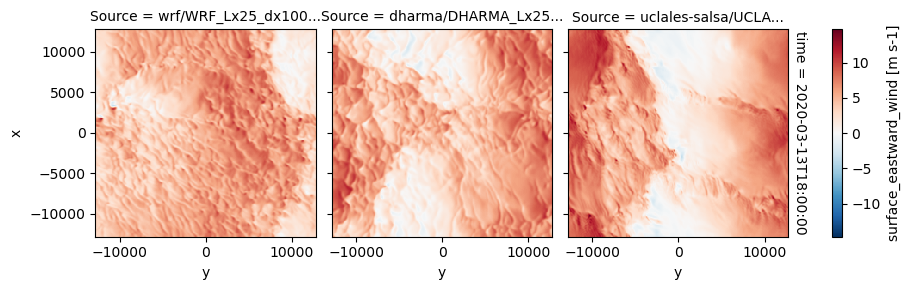

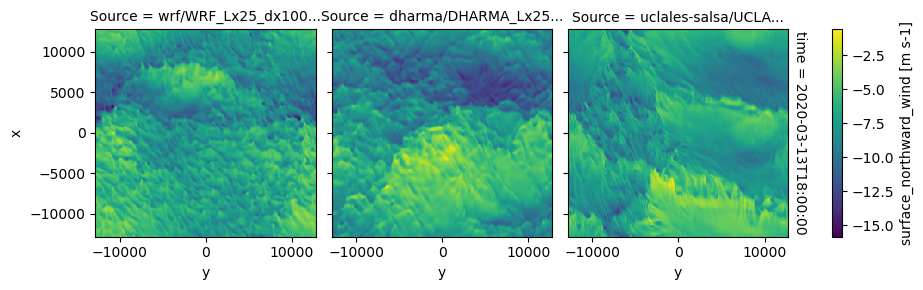

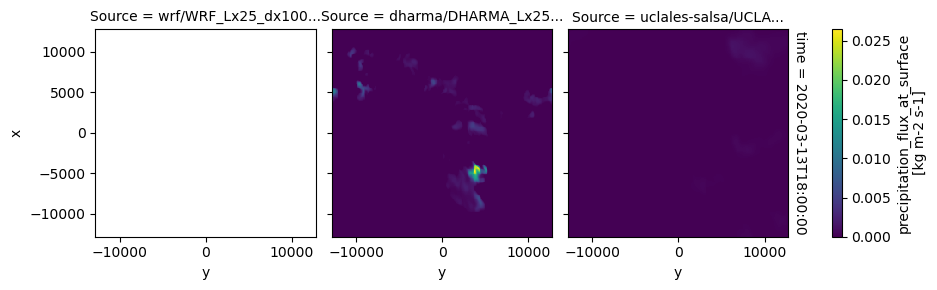

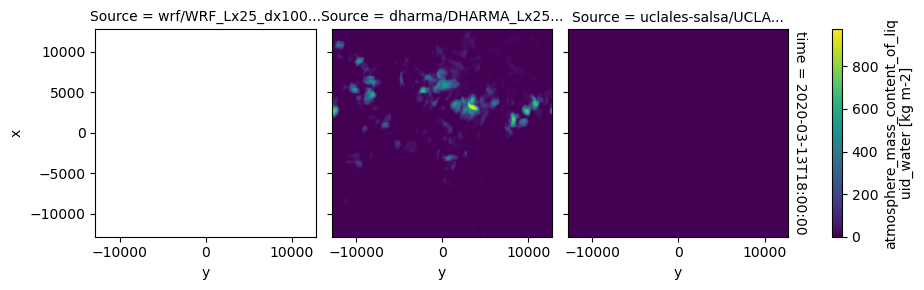

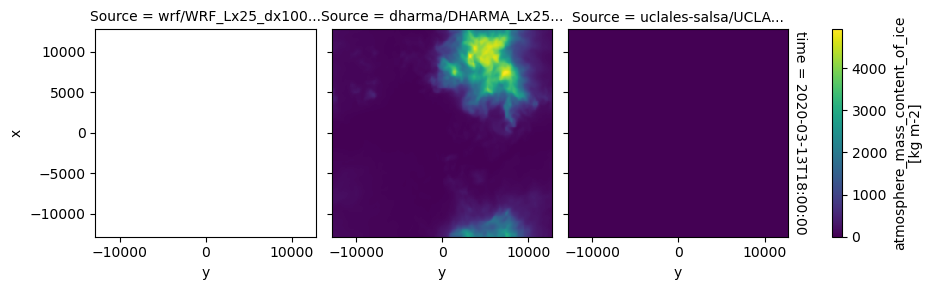

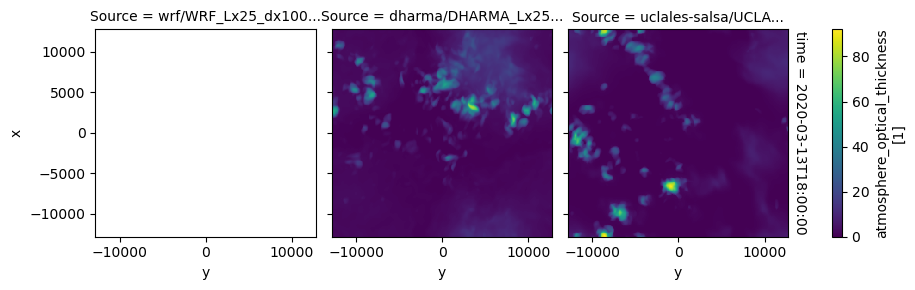

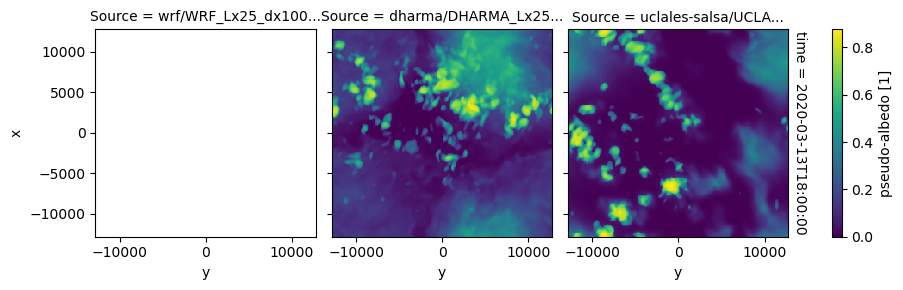

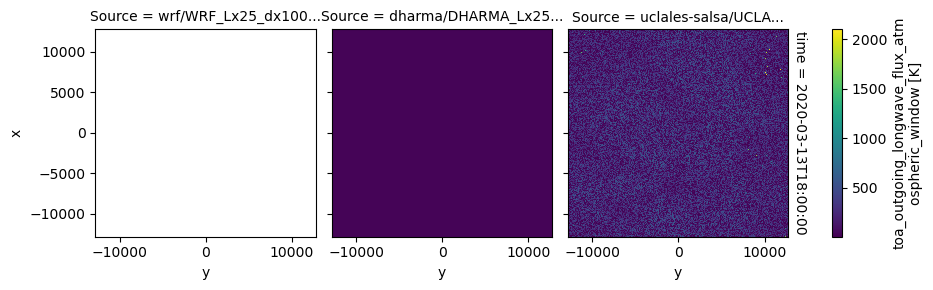

<Figure size 1000x600 with 0 Axes>

In [91]:
%run functions_plotting.py
plot_2d_map(df_col_2d,var_vec_2d,times=time_vec)